In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Task 3 Titanic dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df.Age.mean()

30.272590361445783

In [14]:
import numpy as np

In [16]:
np.mean(df.Age)

30.272590361445783

In [18]:
df.groupby('Sex').Age.mean()

Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

In [20]:
df['Age'].fillna(round(df.Age.mean(), 1), inplace = True)

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
df.Fare.fillna(df.Fare.mean(), inplace = True)

In [26]:
df.drop('Cabin', axis = 1, inplace = True)

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
df.Survived.value_counts() 

Survived
0    266
1    152
Name: count, dtype: int64

In [32]:
 df.Embarked.value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [34]:
a = df.groupby('Pclass').Survived.value_counts()
a

Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           146
        1            72
Name: count, dtype: int64

<Axes: xlabel='Survived'>

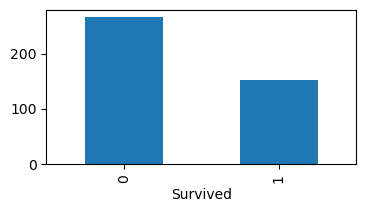

In [36]:
plt.figure(figsize = (4,2))
df.Survived.value_counts().plot(kind = 'bar')

<Axes: ylabel='Embarked'>

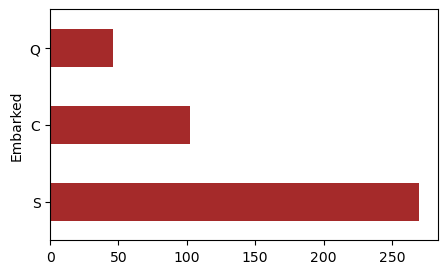

In [38]:
plt.figure(figsize = (5,3))
df.Embarked.value_counts().plot(kind = 'barh', color = 'brown')

<Axes: xlabel='Embarked,Survived'>

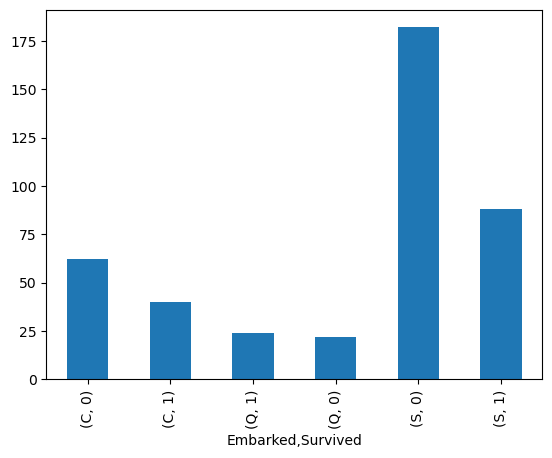

In [40]:
#plt.figure(figsize= (10,8))

df.groupby('Embarked').Survived.value_counts().plot(kind = 'bar')

In [42]:
df.Survived.value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [44]:
df.Ticket.nunique()

363

<Axes: >

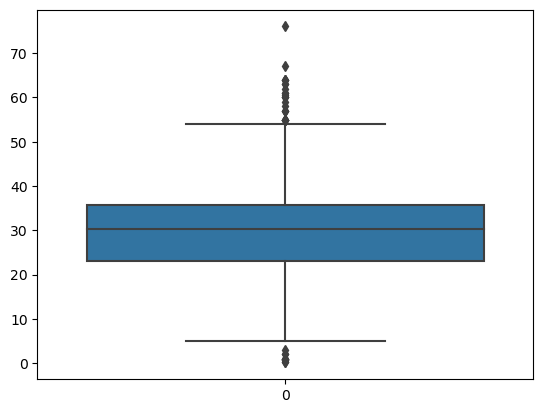

In [46]:
sns.boxplot(df.Age)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [50]:
df2 = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [54]:
le= LabelEncoder()

In [56]:
df2.Sex = le.fit_transform(df2.Sex)

In [58]:
df2.Embarked = le.fit_transform(df2.Embarked)

In [60]:
x = df2.drop('Survived', axis = 1)
y = df2.Survived    

In [62]:
lm = LogisticRegression()
lm.fit(x,y)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
predict_y = lm.predict(x)

In [66]:
lm.score(x,y)

1.0

In [68]:
 y==predict_y

0      True
1      True
2      True
3      True
4      True
       ... 
413    True
414    True
415    True
416    True
417    True
Name: Survived, Length: 418, dtype: bool

In [70]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y, predict_y)

1.0

In [74]:
df3 = pd.DataFrame({'y' : y, 'predict_y' : predict_y})
df3['y == predict_y'] = y == predict_y
df3

,y,predict_y,y == predict_y
0,0,0,True
1,1,1,True
2,0,0,True
3,0,0,True
4,1,1,True
...,...,...,...
413,0,0,True
414,1,1,True
415,0,0,True
416,0,0,True


In [76]:
df3['y == predict_y'].value_counts()


y == predict_y
True    418
Name: count, dtype: int64